In [3]:
from ai2thor.controller import Controller
from ai2thor.platform import CloudRendering
from butler.controller import ButController as Controller
from butler.controller import MultiButController as MultiController
import matplotlib.pyplot as plt
from butler.utils import *

https://ai2thor.allenai.org/ithor/documentation/environment-state

Event Response
- metadata: dict[str]
- frame: RGB array
- cv2img: BGR array
- depth_frame: distance from agent to each pixel
- instance_segmentation_frame



In [3]:
controller = Controller(scene="FloorPlan10")
#event = controller.step(action="RotateRight")
event = controller.last_event
metadata = event.metadata

In [3]:
print(event)
print(metadata.keys())

<ai2thor.server.Event at 0x7fe17e86c880
    .metadata["lastAction"] = Initialize
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = {'cameraNearPlane': 0.009999999776482582, 'cameraFarPlane': 20.0}
>
dict_keys(['objects', 'isSceneAtRest', 'agent', 'heldObjectPose', 'arm', 'fov', 'cameraPosition', 'cameraOrthSize', 'thirdPartyCameras', 'collided', 'collidedObjects', 'inventoryObjects', 'sceneName', 'lastAction', 'errorMessage', 'errorCode', 'lastActionSuccess', 'screenWidth', 'screenHeight', 'agentId', 'depthFormat', 'colors', 'flatSurfacesOnGrid', 'distances', 'normals', 'isOpenableGrid', 'segmentedObjectIds', 'objectIdsInBox', 'actionIntReturn', 'actionFloatReturn', 'actionStringsReturn', 'actionFloatsReturn', 'actionVector3sReturn', 'visibleRange', 'currentTime', 'sceneBounds', 'actionReturn'])


In [4]:
controller.objects

objectType                           objectId                   name  \
0          Floor         Floor|+00.00|+00.00|+00.00         Floor_b7d05094   
1    StoveBurner   StoveBurner|+00.84|+00.92|-01.10   StoveBurner_7e32c1bb   
2        Cabinet       Cabinet|+00.65|+00.48|+00.24       Cabinet_5bf34838   
3    StoveBurner   StoveBurner|+01.08|+00.92|-01.50   StoveBurner_071647e1   
4    StoveBurner   StoveBurner|+00.84|+00.92|-01.50   StoveBurner_bd86687e   
..           ...                                ...                    ...   
62         Shelf         Shelf|-01.64|+00.88|+02.72         Shelf_f0e24e57   
63  ShelvingUnit  ShelvingUnit|-01.64|+00.01|+02.72  ShelvingUnit_90602e59   
64         Chair         Chair|-01.83|+00.00|-00.03         Chair_82ba0433   
65         Chair         Chair|-01.85|+00.00|-00.96         Chair_5332cfa8   
66        Faucet        Faucet|-00.95|+00.95|-00.65        Faucet_011a22ab   

    position[x]  position[y]  position[z]  rotation[x]  rotation[y]  \
0        0.0000       0.0000       0.0000      -0.0000       0.0000   
1        0.8420       0.9193      -1.0985      -0.0000       0.0000   
2        0.6488       0.4750       0.2450      -0.0000     270.0000   
3        1.0776       0.9193      -1.5042      -0.0000       0.0000   
4        0.8420       0.9193      -1.5042      -0.0000       0.0000   
..          ...          ...          ...          ...          ...   
62      -1.6358       0.8809       2.7158      -0.0001     180.0222   
63      -1.6358       0.0068       2.7156      -0.0001     180.0222   
64      -1.8320       0.0020      -0.0342     359.8606     119.9962   
65      -1.8540       0.0020      -0.9562     359.8605      67.8858   
66      -0.9460       0.9506      -0.6500      -0.0000      90.0000   

    rotation[z]  distance  ...  openness  pickupable  isPickedUp  moveable  \
0        0.0000    1.5409  ...       0.0       False       False     False   
1        0.0000    0.8557  ...       0.0       False       False     False   
2        0.0000    1.6845  ...       0.0       False       False     False   
3        0.0000    1.1073  ...       0.0       False       False     False   
4        0.0000    0.8797  ...       0.0       False       False     False   
..          ...       ...  ...       ...         ...         ...       ...   
62       0.0001    4.2899  ...       0.0       False       False     False   
63       0.0001    4.3819  ...       0.0       False       False      True   
64       0.0288    2.3754  ...       0.0       False       False      True   
65       0.0287    2.0813  ...       0.0       False       False      True   
66      -0.0000    1.1213  ...       0.0       False       False     False   

    mass  salientMaterials              assetId             parentReceptacles  \
0    1.0            [Wood]                                               None   
1    0.0              None                                               None   
2    0.0              None                                               None   
3    0.0              None                                               None   
4    0.0              None                                               None   
..   ...               ...                  ...                           ...   
62   0.0              None                                               None   
63  22.0            [Wood]  Shelving_Unit_001_1  [Floor|+00.00|+00.00|+00.00]   
64  10.0            [Wood]          Chair_007_1  [Floor|+00.00|+00.00|+00.00]   
65  10.0            [Wood]          Chair_007_1  [Floor|+00.00|+00.00|+00.00]   
66   0.0              None     Kitchen_Faucet_1                          None   

    controlledObjects isMoving  
0                None    False  
1                None    False  
2                None    False  
3                None    False  
4                None    False  
..                ...      ...  
62               None    False  
63               None    False  
64       

In [5]:
controller.attributes

Index(['objectType', 'objectId', 'name', 'position[x]', 'position[y]',
       'position[z]', 'rotation[x]', 'rotation[y]', 'rotation[z]', 'distance',
       'visible', 'isInteractable', 'receptacle', 'toggleable', 'isToggled',
       'breakable', 'isBroken', 'canFillWithLiquid', 'isFilledWithLiquid',
       'fillLiquid', 'dirtyable', 'isDirty', 'canBeUsedUp', 'isUsedUp',
       'cookable', 'isCooked', 'temperature', 'isHeatSource', 'isColdSource',
       'sliceable', 'isSliced', 'openable', 'isOpen', 'openness', 'pickupable',
       'isPickedUp', 'moveable', 'mass', 'salientMaterials', 'assetId',
       'parentReceptacles', 'controlledObjects', 'isMoving'],
      dtype='object')

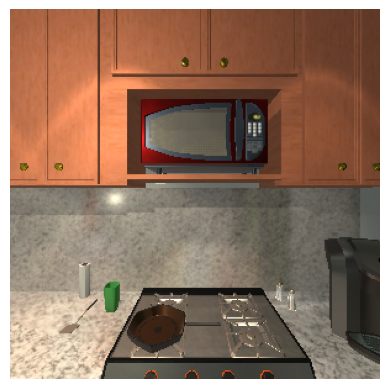

In [9]:
controller.render();

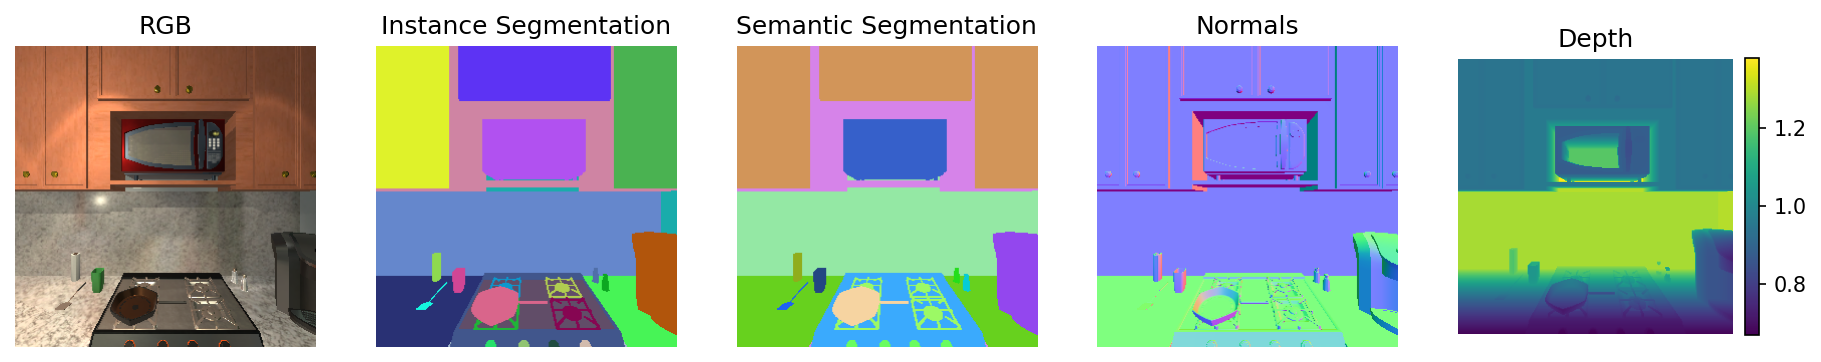

In [6]:
controller.plot_frames()

In [7]:
controller.reset()
frames = [
    controller.step(action="RotateLeft", degrees=5).frame
    for _ in range(230 // 5)
]
show_video(frames, fps=5)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [10]:
controller.get_obj_by_name('StoveBurner_7e32c1bb')

objectType                          objectId                  name  \
1  StoveBurner  StoveBurner|+00.84|+00.92|-01.10  StoveBurner_7e32c1bb   

   position[x]  position[y]  position[z]  rotation[x]  rotation[y]  \
1        0.842       0.9193      -1.0985         -0.0          0.0   

   rotation[z]  distance  ...  openness  pickupable  isPickedUp  moveable  \
1          0.0    0.8557  ...       0.0       False       False     False   

   mass  salientMaterials  assetId  parentReceptacles  controlledObjects  \
1   0.0              None                        None               None   

  isMoving  
1    False  

[1 rows x 43 columns]

In [11]:
controller.get_obj_by_id('StoveBurner|+00.84|+00.92|-01.10')

objectType                          objectId                  name  \
1  StoveBurner  StoveBurner|+00.84|+00.92|-01.10  StoveBurner_7e32c1bb   

   position[x]  position[y]  position[z]  rotation[x]  rotation[y]  \
1        0.842       0.9193      -1.0985         -0.0          0.0   

   rotation[z]  distance  ...  openness  pickupable  isPickedUp  moveable  \
1          0.0    0.8557  ...       0.0       False       False     False   

   mass  salientMaterials  assetId  parentReceptacles  controlledObjects  \
1   0.0              None                        None               None   

  isMoving  
1    False  

[1 rows x 43 columns]

https://ai2thor.allenai.org/ithor/documentation/objects/object-types/

Properties of objects are divided into three categories:
- actionable: the agent can change it directly
- material: temperature, mass, salientMaterials
- Receptacle: can be placed / interact with other objects


But material properties are important for learning the correct policy. For example, lifting
heavier weight might require a slightly different policy.

Can we learn the property segmentation?

In [6]:
controller.get_actionable_properties('StoveBurner'), controller.get_actionable_properties('StoveKnob')

(['receptacle'], ['toggleable'])

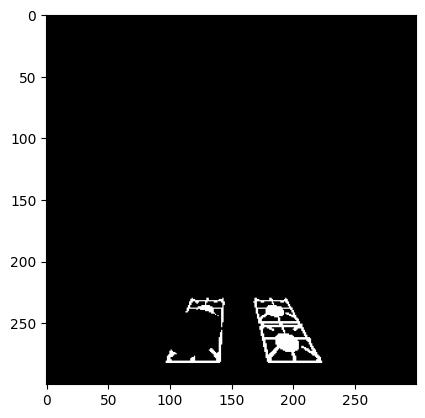

In [3]:
controller.focus_object_type('StoveBurner');

## Agent's actions

- movement: (https://ai2thor.allenai.org/ithor/documentation/navigation)
- moveAhead, moveBack, moveLeft, moveRight, (like grid-world)
- rotateLeft, rotateRight, 
- lookUp, lookDown: change the camera angle to get different views of the scene
- might be important for object search ect...
- crouch, stand: change the height of the agent
- done: end the episode

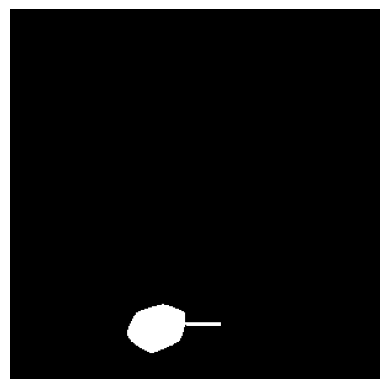

In [8]:
# trying to pick up the pan
controller.focus_object_type('Pan');

In [9]:
controller.get_actionable_properties('Pan')

['pickupable', 'receptacle', 'dirtyable']

In [15]:
controller.event.objects_by_type('Pan')[0]['objectId']

'Pan|+00.85|+00.95|-01.08'

In [27]:
controller.reset()
info = controller.step(action='PickupObject', objectId='Pan|+00.85|+00.95|-01.08',
manualInteract=False)
info, info.metadata['lastActionSuccess']

(<ai2thor.server.Event at 0x7fdb97a20dc0
     .metadata["lastAction"] = PickupObject
     .metadata["lastActionSuccess"] = True
     .metadata["errorMessage"] = "
     .metadata["actionReturn"] = Pan|+00.85|+00.95|-01.08
 >,
 True)

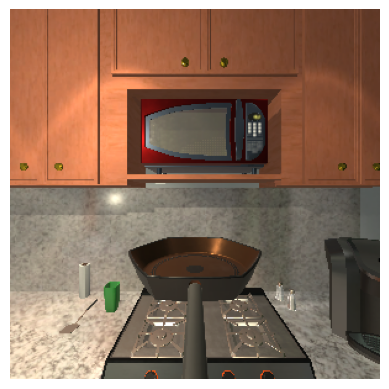

In [28]:
controller.render();

# Pubs
https://ai2thor.allenai.org/publications/#filters

# Scenes 
https://ai2thor.allenai.org/ithor/documentation/scenes

```
kitchens = [f"FloorPlan{i}" for i in range(1, 31)]
living_rooms = [f"FloorPlan{200 + i}" for i in range(1, 31)]
bedrooms = [f"FloorPlan{300 + i}" for i in range(1, 31)]
bathrooms = [f"FloorPlan{400 + i}" for i in range(1, 31)]

scenes = kitchens + living_rooms + bedrooms + bathrooms

```

In [2]:
Controller.get_scenes('bathroom')

['FloorPlan401_physics',
 'FloorPlan402_physics',
 'FloorPlan403_physics',
 'FloorPlan404_physics',
 'FloorPlan405_physics',
 'FloorPlan406_physics',
 'FloorPlan407_physics',
 'FloorPlan408_physics',
 'FloorPlan409_physics',
 'FloorPlan410_physics',
 'FloorPlan411_physics',
 'FloorPlan412_physics',
 'FloorPlan413_physics',
 'FloorPlan414_physics',
 'FloorPlan415_physics',
 'FloorPlan416_physics',
 'FloorPlan417_physics',
 'FloorPlan418_physics',
 'FloorPlan419_physics',
 'FloorPlan420_physics',
 'FloorPlan421_physics',
 'FloorPlan422_physics',
 'FloorPlan423_physics',
 'FloorPlan424_physics',
 'FloorPlan425_physics',
 'FloorPlan426_physics',
 'FloorPlan427_physics',
 'FloorPlan428_physics',
 'FloorPlan429_physics',
 'FloorPlan430_physics']

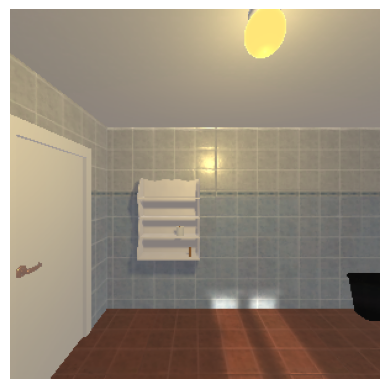

In [4]:
# test out one bathroom scene
controller = Controller(scene="FloorPlan401_physics")
controller.render();

In [15]:
# looking around the bathroom!
# NOTE: in floorplan401, there's a camera in the bathroom (what? why??)
controller.reset()
frames = [
    controller.step(action="RotateLeft", degrees=5).frame
    for _ in range(360 // 5)
]
show_video(frames, fps=5)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


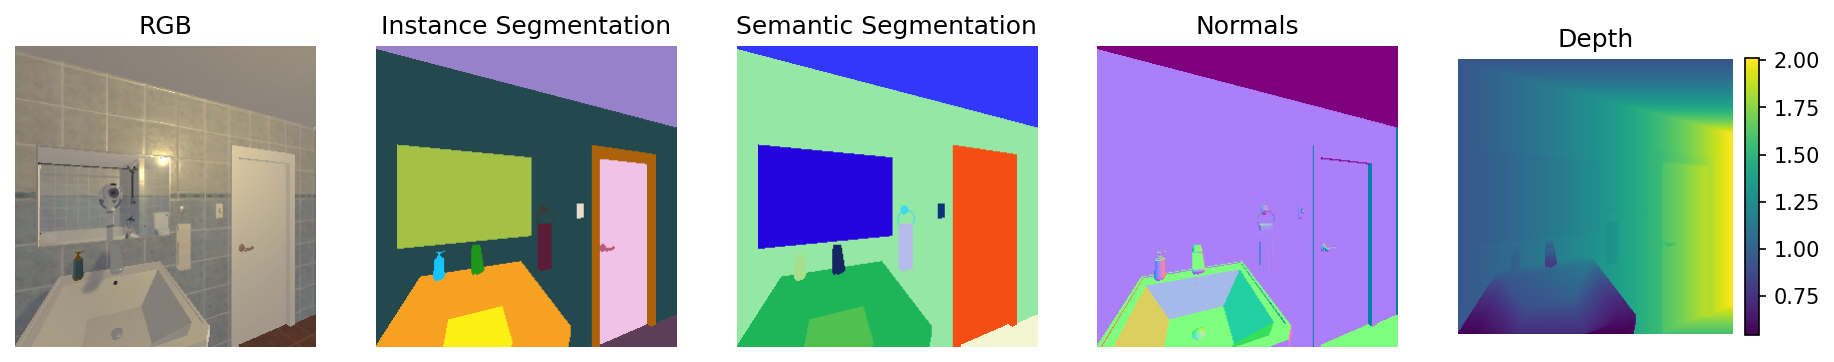

In [4]:
# https://github.com/allenai/ai2thor/issues/156
# try to remove the object (creepy camera) from the scene!
controller.reset()
for i in range(14):
    controller.step(action="RotateLeft", degrees=5)

# BUG: why isn't the camera visible in the instance/ semantic segmentation?
controller.plot_frames();

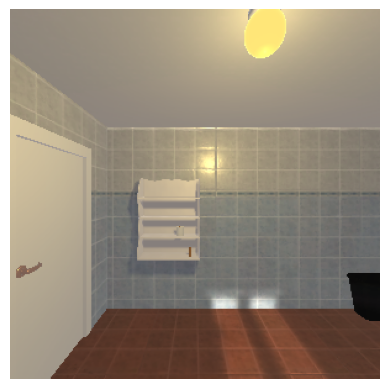

In [4]:
controller.reset()
controller.render();

In [14]:
controller.reset()
controller.objects[(controller.objects['visible'] == False)]

objectType                                   objectId  \
0              Faucet                Faucet|-00.14|+00.61|-00.28   
1              Window                Window|-01.51|+01.32|-00.36   
2              Faucet                Faucet|-03.40|+01.02|+01.53   
3        BathtubBasin  Bathtub|-00.21|+00.36|+00.92|BathtubBasin   
4       ShowerCurtain         ShowerCurtain|-00.79|+02.22|-00.24   
6          ShowerHead            ShowerHead|-00.07|+00.91|+02.15   
7             Bathtub               Bathtub|-00.21|+00.36|+00.92   
8              Mirror                Mirror|-03.45|+01.58|+01.52   
9               Towel                 Towel|-01.30|+01.06|-00.18   
10          HandTowel             HandTowel|-03.42|+01.34|+02.10   
11            Plunger               Plunger|+00.36|+00.00|+02.47   
12        TowelHolder           TowelHolder|-02.05|+01.05|-00.29   
13        TowelHolder           TowelHolder|-01.30|+01.05|-00.29   
14  ToiletPaperHanger     ToiletPaperHanger|-00.43|+00.78|+02.28   
15            SoapBar               SoapBar|-00.69|+00.62|+01.99   
16        ToiletPaper           ToiletPaper|-02.45|+01.03|+03.95   
17         SoapBottle            SoapBottle|-03.41|+01.02|+01.29   
18              Shelf                 Shelf|-02.59|+00.78|+03.91   
19              Shelf                 Shelf|-02.59|+01.29|+03.94   
20              Shelf                 Shelf|-02.59|+01.03|+03.94   
21              Shelf                 Shelf|-02.59|+01.53|+03.91   
22         GarbageCan             GarbageCan|+00.05|00.00|+03.88   
23    HandTowelHolder       HandTowelHolder|-03.46|+01.46|+02.10   
24    HandTowelHolder       HandTowelHolder|-03.46|+01.46|+00.82   
25        ToiletPaper           ToiletPaper|-02.31|+00.77|+03.88   
26              Cloth                 Cloth|-00.27|+00.04|+01.02   
27     PaperTowelRoll        PaperTowelRoll|-03.15|+00.96|+00.28   
28             Candle                Candle|-03.11|+00.23|-00.05   
29        SprayBottle           SprayBottle|-03.09|+00.23|+00.29   
30         ScrubBrush            ScrubBrush|+00.40|+00.00|+02.69   
31         DishSponge            DishSponge|-03.20|+00.86|+00.02   
32             Toilet                Toilet|+00.06|+00.00|+03.10   
33        LightSwitch           LightSwitch|-03.46|+01.44|+02.50   
34               Sink                  Sink|-03.12|-00.01|+01.53   
35          SinkBasin        Sink|-03.12|-00.01|+01.53|SinkBasin   
36          SideTable             SideTable|-03.17|+00.00|+00.17   

                          name  position[x]  position[y]  position[z]  \
0              Faucet_65080eb1      -0.1413       0.6120      -0.2770   
1              Window_1b967826      -1.5073       1.3229      -0.3648   
2              Faucet_d2937e82      -3.4011       1.0175       1.5310   
3        BathtubBasin_5be69ab2      -0.1551       0.0427       0.8844   
4       ShowerCurtain_d39572d2      -0.7870       2.2210      -0.2420   
6          ShowerHead_748119b5      -0.0740       0.9060       2.1450   
7             Bathtub_1e5eeadb      -0.2051       0.3597       0.9244   
8              Mirror_cdc4bad0      -3.4480       1.5750       1.5169   
9               Towel_e1652f70      -1.3040       1.0591      -0.1836   
10          HandTowel_866cfc08      -3.4221       1.3380       2.0952   
11            Plunger_5fabae3a       0.3620       0.0002       2.4680   
12        TowelHolder_00c28bea      -2.0500       1.0451      -0.2905   
13        TowelHolder_2f640889      -1.3040       1.0451      -0.2905   
14  ToiletPaperHanger_1ed28ccf      -0.4260       0.7840       2.2780   
15            SoapBar_85b3cbdc      -0.6855       0.6209       1.9896   
16        ToiletPaper_62aa6cba      -2.4508       1.0257       3.9531   
17         SoapBottle_60ad1ed2      -3.4050       1.0250       1.2940   
18              Shelf_c4eb3f8b      -2.5878       0.7790       3.9098   
19              Shelf_1d346148      -2.5878       1.2878       3.9420   
20              Shelf_9b10e015    

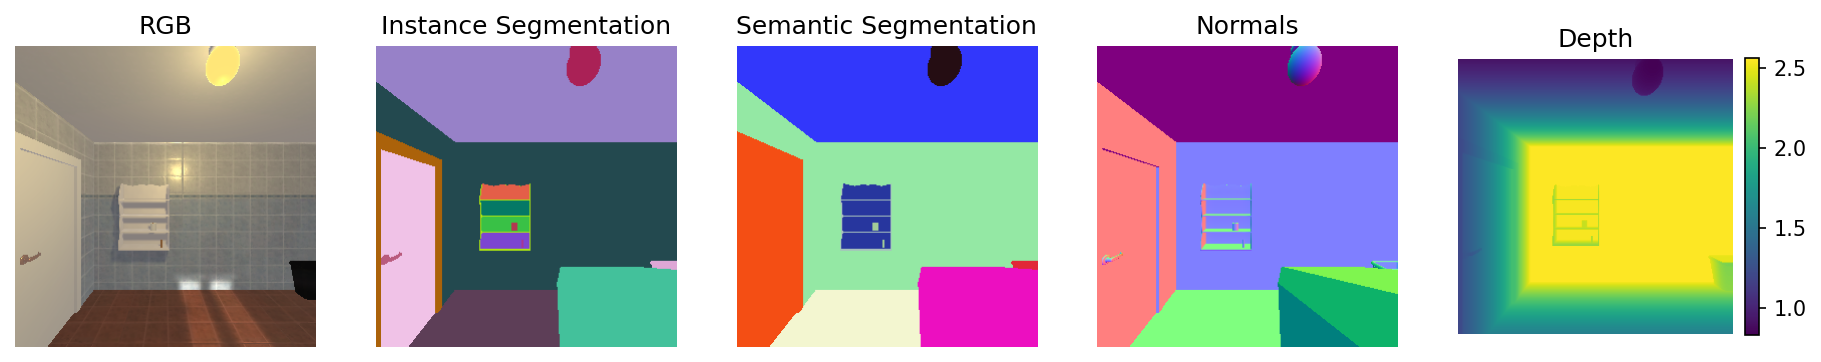

In [15]:
controller.plot_frames()

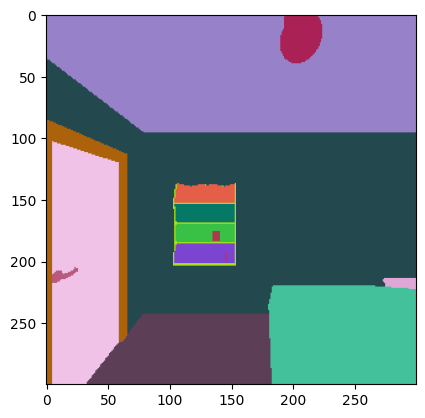

In [15]:
# why is the floor segmented into two parts? What's the greenish thing?
plt.imshow(controller.event.instance_segmentation_frame);

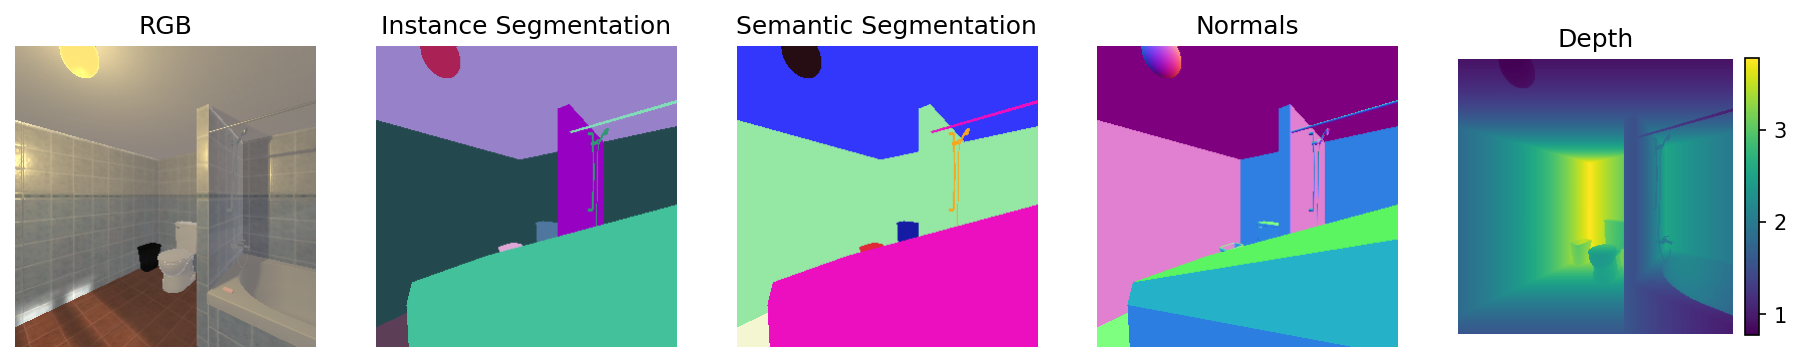

In [7]:
# instance segmentation is NOT perfect
controller.reset()
for i in range(10):
    controller.step(action="RotateRight", degrees=5).frame

controller.plot_frames();

In [16]:
controller.event.color_to_object_id

{(185, 90, 125): 'FP401:Handle_Front|-3.493547|1.026769|2.810676',
 (244, 78, 20): 'Door',
 (151, 129, 200): 'Ceiling|-1.443998|2.543|1.846038',
 (50, 55, 251): 'Ceiling',
 (248, 86, 132): 'Window|-01.51|+01.32|-00.36',
 (200, 150, 134): 'Window',
 (35, 73, 79): 'Walls|0|0.07709608|0',
 (148, 232, 164): 'Wall',
 (130, 222, 185): 'CurtainRod|-0.9031552|2.220475|-0.04399928',
 (236, 15, 192): 'Undefined',
 (165, 193, 69): 'Mirror|-03.45|+01.58|+01.52',
 (36, 3, 222): 'Mirror',
 (67, 193, 155): 'FP401:Baseboard.000|-1.515158|-0.2092298|1.336322',
 (76, 211, 130): 'Bathtub|-00.21|+00.36|+00.92',
 (59, 170, 176): 'Bathtub',
 (172, 229, 18): 'WallShelf',
 (171, 98, 10): 'FP401:DoorFrame|-3.500448|-0.02323122|3.139676',
 (93, 62, 87): 'Floor|-01.44|-00.04|+01.85',
 (243, 246, 208): 'Floor',
 (69, 78, 97): 'FP401:Sphere.016|-1.25832|-0.08652811|0.9244089',
 (84, 204, 46): 'Rug',
 (151, 1, 193): 'FP401:polySurface299|0|0.07709608|0',
 (240, 194, 231): 'FP401:Door|-3.522547|1.026769|2.719676',
 

In [3]:
controller.visible_objects

objectType                    objectId            name  position[x]  \
5      Floor  Floor|-01.44|-00.04|+01.85  Floor_b0ab29be       -1.444   

   position[y]  position[z]  rotation[x]  rotation[y]  rotation[z]  distance  \
5      -0.0422        1.846         -0.0          0.0          0.0    1.2885   

   ...  openness  pickupable  isPickedUp  moveable  mass  salientMaterials  \
5  ...       0.0       False       False     False   1.0         [Ceramic]   

   assetId  parentReceptacles  controlledObjects isMoving  
5                        None               None    False  

[1 rows x 43 columns]

In [7]:
list(controller.event.instance_detections2D.keys())

['FP401:Handle_Front|-3.493547|1.026769|2.810676',
 'Ceiling|-1.443998|2.543|1.846038',
 'Walls|0|0.07709608|0',
 'FP401:Baseboard.000|-1.515158|-0.2092298|1.336322',
 'FP401:DoorFrame|-3.500448|-0.02323122|3.139676',
 'Floor|-01.44|-00.04|+01.85',
 'FP401:Door|-3.522547|1.026769|2.719676',
 'FP401:Cylinder.063|-1.899|2.414703|2.435',
 'ToiletPaper|-02.45|+01.03|+03.95',
 'ToiletPaper|-02.31|+00.77|+03.88',
 'GarbageCan|+00.05|00.00|+03.88',
 'Shelf|-02.59|+00.78|+03.91',
 'Shelf|-02.59|+01.03|+03.94',
 'Shelf|-02.59|+01.29|+03.94',
 'Shelf|-02.59|+01.53|+03.91']

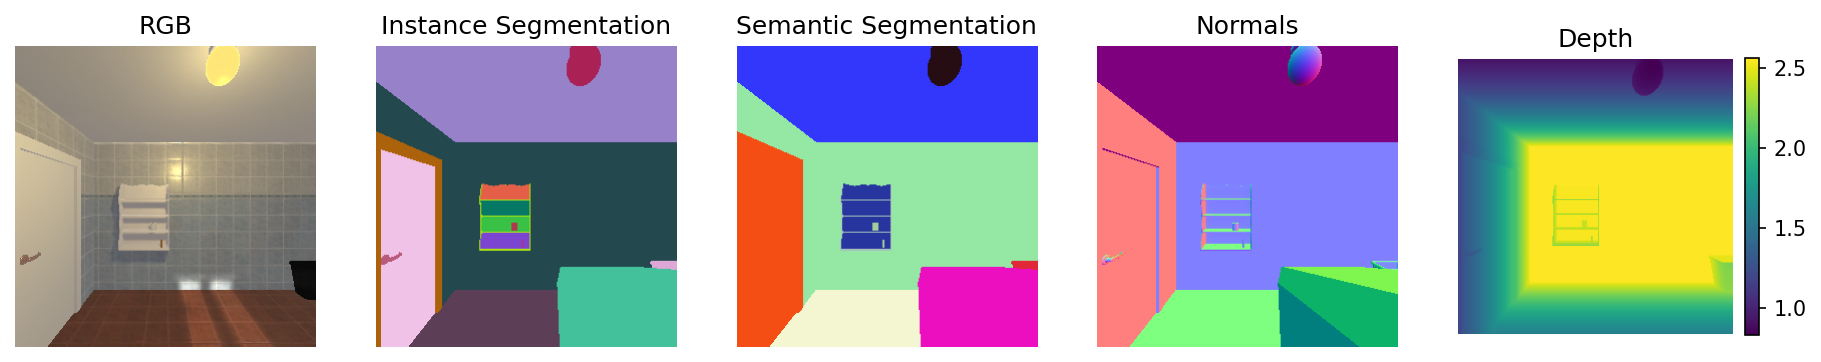

In [10]:
controller.plot_frames();

In [ ]:
# https://github.com/allenai/ai2thor/issues/815 (visibility)

# Agent attributes

https://ai2thor.allenai.org/ithor/documentation/navigation/

- Position: (x, y, z)
- Rotation: (x, y, z)
- horizon: camera angle {-30, 0, 30, 60}
- standing: true/false

In [4]:
controller.agent

{'name': 'agent',
 'position': {'x': 0.0, 'y': 0.9009992480278015, 'z': -1.25},
 'rotation': {'x': -0.0, 'y': 90.0, 'z': 0.0},
 'cameraHorizon': -0.0,
 'isStanding': True,
 'inHighFrictionArea': False}

# Multi-agent

https://github.com/allenai/ai2thor/issues/533

https://colab.research.google.com/drive/1ityVEzHNN7k4Xek7-yfX_x_VRWNtO2wz?usp=sharing#scrollTo=Rhe2zbQHFztC


In [2]:
controller = MultiController(
    scene='FloorPlan16',
    agentCount=2,
)

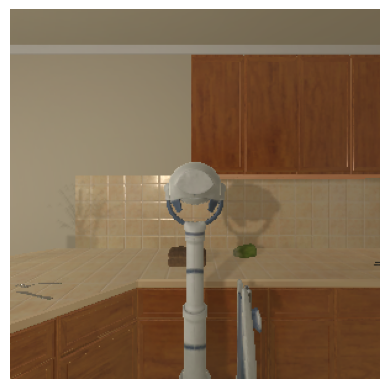

In [3]:
controller.render();

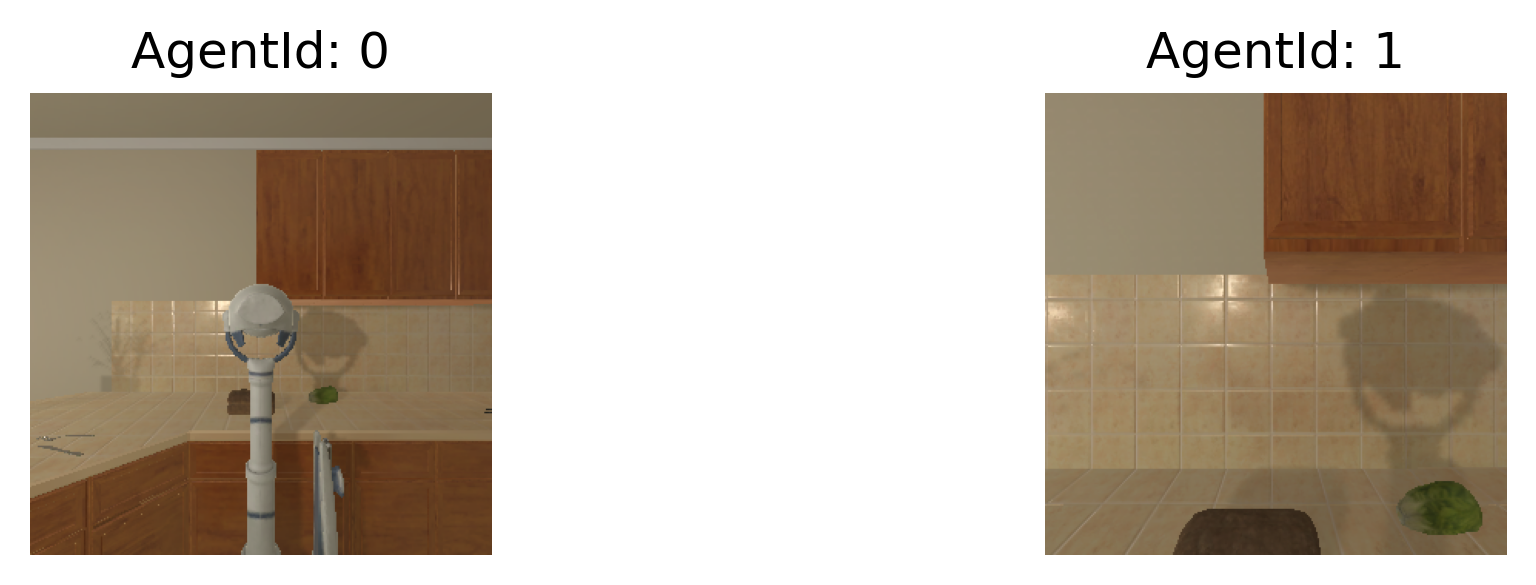

In [4]:
controller.render_agents();

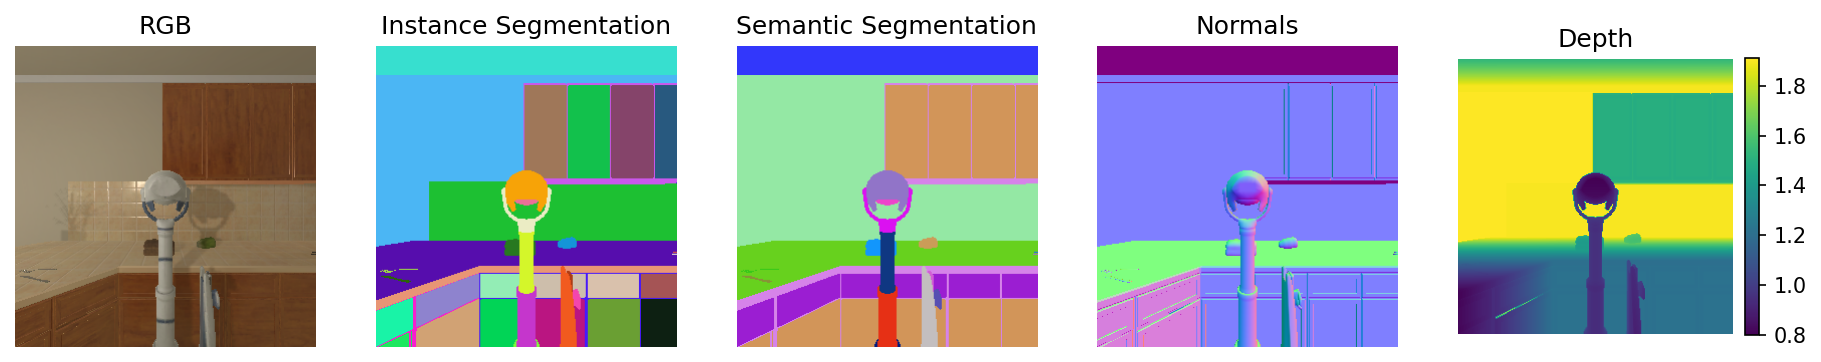

In [5]:
controller.plot_frames();

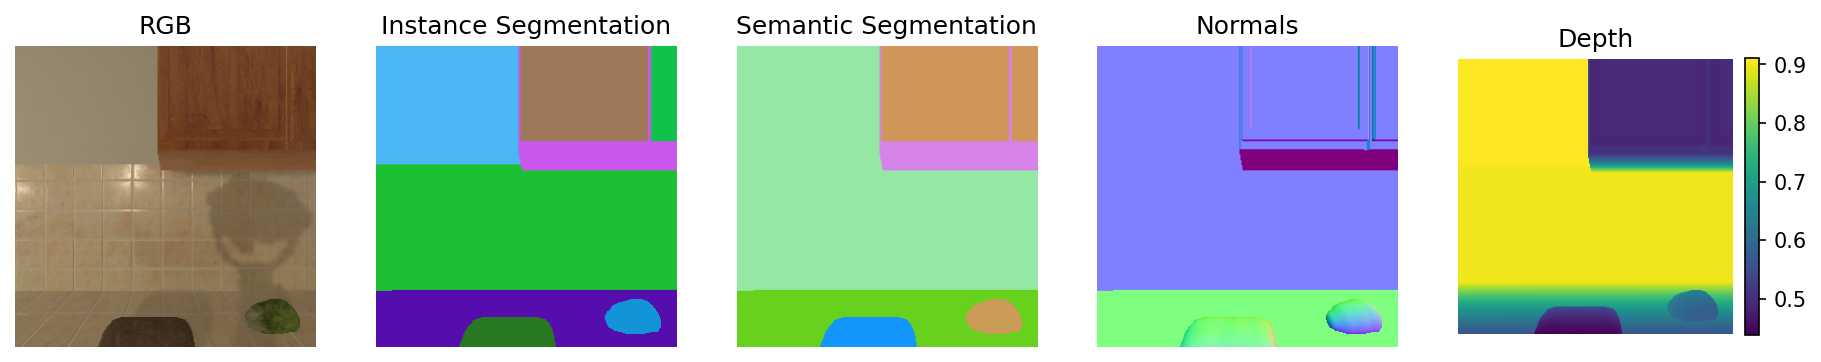

In [6]:
controller.choose_agent(1)
controller.plot_frames();

# ManipularThor

Finer action control

In [ ]:
controller.last_event.metadata['agent']